In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/CV Project/source_code'

/content/drive/My Drive/CV Project/SSD


In [ ]:
! mkdir '/content/data/wider_face'

mkdir: cannot create directory ‘/content/data/wider_face’: No such file or directory


In [ ]:
! mkdir '/content/data/hog_svm'

mkdir: cannot create directory ‘/content/data/hog_svm’: No such file or directory


In [ ]:
! unrar x '/content/drive/My Drive/CV Project/source_code/dataset/wider_face.rar'  '/content/data/'

Streaming output truncated to the last 5000 lines.
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_480.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_49.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_491.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_494.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_498.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_501.jpg      83%  OK 
Extracting  /content/data/wider_face/train/images/55--Sports_Coach_T

In [ ]:
! unrar x '/content/drive/My Drive/CV Project/source_code/dataset/hog_svm.rar'  '/content/data/'

Streaming output truncated to the last 5000 lines.
Extracting  /content/data/hog_svm/hard_negatives/80649.jpg                98%  OK 
Extracting  /content/data/hog_svm/hard_negatives/8065.jpg                 98%  OK 
Extracting  /content/data/hog_svm/hard_negatives/80650.jpg                98%  OK 
Extracting  /content/data/hog_svm/hard_negatives/80651.jpg                98%  OK 
Extracting  /content/data/hog_svm/hard_negatives/80652.jpg                98%  OK 
Extracting  /content/data/hog_svm/hard_negatives/80653.jpg                98%  OK 
Extracting  /content/data/hog_svm/hard_negatives/80654.jpg                98%  OK 
Extracting  /content/data/hog_svm/hard_negatives/80655.jpg                98%  OK 
Extracting  /content/data/hog_svm/hard_negatives/80656.jpg                98%  OK 
Extracting  /content/data/hog_svm/hard_negatives/80657.jpg                98%  OK 
Extracting  /content/data/hog

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import joblib
from skimage.transform import pyramid_gaussian
import joblib
from PIL import Image
import os
import random
from tqdm.notebook import tqdm
from PIL import Image
from skimage import color

In [ ]:
import cv2
# hog = cv2.HOGDescriptor()
# test_image = cv2.imread(sample)
cell_size = (6, 6)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
# cell_size is the size of the cells of the img patch over which to calculate the histograms
# block_size is the number of cells which fit in the patch

def calculate_hog(img):
  cell_size = (6, 6)  # h x w in pixels
  block_size = (2, 2)  # h x w in cells
  nbins = 9  # number of orientation bins

  img = img.astype(np.uint8)
  # print(img)
  hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                    img.shape[0] // cell_size[0] * cell_size[0]),
                          _blockSize=(block_size[1] * cell_size[1],
                                      block_size[0] * cell_size[0]),
                          _blockStride=(cell_size[1], cell_size[0]),
                          _cellSize=(cell_size[1], cell_size[0]),
                          _nbins=nbins)

  hist = hog.compute(img)
  hist = hist.squeeze()
  return hist

### 1. Obtain a set of positive training samples

In [ ]:
positive_im_path = "/content/data/hog_svm/cropped_positive"
positive_list = []
for img in os.listdir(positive_im_path):
  im_path = positive_im_path + '/' + img 
  positive_list.append(im_path)

positive_list = random.sample(positive_list, 20000)
positive_patches = []
for file in tqdm(positive_list):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (36,48))
#     img = Image.open(file)
    positive_patches.append(img)

positive_patches = np.array(positive_patches)
positive_patches.shape

  0%|          | 0/20000 [00:00<?, ?it/s]

(20000, 48, 36)

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

In [ ]:
resized_positive_patches = []
for face in positive_patches:
  new_face = cv2.resize(face, (36,48))
  resized_positive_patches.append(new_face)
positive_lfw_patches = np.array(resized_positive_patches)
positive_lfw_patches.shape

(13233, 48, 36)

In [ ]:
flipped_positive_patches = []
for face in positive_patches:
  flipped = cv2.flip(face, 1)
  flipped_positive_patches.append(flipped)

flipped_positive_patches = np.array(flipped_positive_patches)
positive_patches = np.concatenate( (positive_patches,flipped_positive_patches), 0 )
positive_patches.shape


(26466, 62, 47)

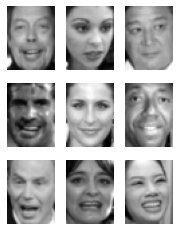

In [ ]:
fig, ax = plt.subplots(3,3)
fig.set_figheight(4)
fig.set_figwidth(3)

for i, axi in enumerate(ax.flat):
    axi.imshow(positive_lfw_patches[500 * i], cmap='gray')
    axi.axis('off')

# cv2_imshow(test_face)

### 2. Obtain a set of negative training samples



This gives us a sample of 13,000 face images to use for training.

In [ ]:
from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys


In [ ]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

(30000, 62, 47)

In [ ]:
hard_negative_im_path = "/content/data/hog_svm/hard_negatives"
hard_negatives_list = []
i = 0
for img in tqdm(os.listdir(hard_negative_im_path)):
  im_path = hard_negative_im_path + '/' + img 
  hard_negatives_list.append(im_path)


  0%|          | 0/108752 [00:00<?, ?it/s]

In [ ]:
hard_negatives_list = random.sample(hard_negatives_list, 20000)

In [ ]:
hard_negatives_list

['/content/data/hog_svm/hard_negatives/33059.jpg',
 '/content/data/hog_svm/hard_negatives/117465.jpg',
 '/content/data/hog_svm/hard_negatives/101130.jpg',
 '/content/data/hog_svm/hard_negatives/54883.jpg',
 '/content/data/hog_svm/hard_negatives/14511.jpg',
 '/content/data/hog_svm/hard_negatives/42267.jpg',
 '/content/data/hog_svm/hard_negatives/83562.jpg',
 '/content/data/hog_svm/hard_negatives/45808.jpg',
 '/content/data/hog_svm/hard_negatives/118211.jpg',
 '/content/data/hog_svm/hard_negatives/110952.jpg',
 '/content/data/hog_svm/hard_negatives/73635.jpg',
 '/content/data/hog_svm/hard_negatives/8223.jpg',
 '/content/data/hog_svm/hard_negatives/10026.jpg',
 '/content/data/hog_svm/hard_negatives/31872.jpg',
 '/content/data/hog_svm/hard_negatives/29243.jpg',
 '/content/data/hog_svm/hard_negatives/119373.jpg',
 '/content/data/hog_svm/hard_negatives/56256.jpg',
 '/content/data/hog_svm/hard_negatives/110126.jpg',
 '/content/data/hog_svm/hard_negatives/59411.jpg',
 '/content/data/hog_svm/ha

In [ ]:
hard_negative_patches = []
for file in tqdm(hard_negatives_list):
  try:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (36,48))
#     img = Image.open(file)
    hard_negative_patches.append(img)
  
  except:
    pass

hard_negative_patches = np.array(hard_negative_patches)
hard_negative_patches.shape

  0%|          | 0/20000 [00:00<?, ?it/s]

(19996, 48, 36)

In [ ]:
negative_patches = np.concatenate( (negative_patches,hard_negative_patches), 0 )
negative_patches.shape

(49996, 48, 36)

In [ ]:
test_negative = negative_patches[20]
print(test_negative)
calculate_hog(test_negative)

[[131.375 131.375 132.625 ...  12.5    12.     12.   ]
 [131.375 131.375 132.625 ...  12.5    12.     12.   ]
 [130.625 130.625 131.375 ...  12.     11.5    11.5  ]
 ...
 [119.625 119.625 122.875 ... 132.625 133.875 133.875]
 [120.375 120.375 125.125 ... 132.375 133.125 133.125]
 [120.375 120.375 125.125 ... 132.375 133.125 133.125]]


array([0.03397755, 0.04880645, 0.06951957, ..., 0.0375881 , 0.07373958,
       0.27741778], dtype=float32)

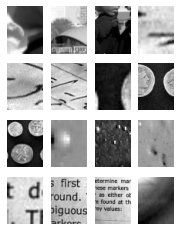

In [ ]:
fig, ax = plt.subplots(4, 4)
fig.set_figheight(4)
fig.set_figwidth(3)


for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[1000 * i], cmap='gray')
    axi.axis('off')

### 3. Combine sets and extract HOG features

Now that we have these positive samples and negative samples, we can combine them and compute HOG features.
This step takes a little while, because the HOG features involve a nontrivial computation for each image:

In [ ]:
from itertools import chain
# X_train = np.array([feature.hog(im , orientations = orientations, pixels_per_cell = pixels_per_cell, cells_per_block = cells_per_block)
#                     for im in chain(positive_patches,
#                                     negative_patches)])

X_train = np.array([calculate_hog(im) for im in chain(positive_patches,negative_patches)])

y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [ ]:
y_train.shape

(76462,)

In [ ]:
X_train.shape

(76462, 1260)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.001,0.01, 0.1, 1]}
svc = LinearSVC()
svc_grid = GridSearchCV(svc, parameters, cv  = 5, verbose = 3)
svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...........................C=0.001;, score=0.977 total time=   3.7s
[CV 2/5] END ...........................C=0.001;, score=0.975 total time=   3.0s
[CV 3/5] END ...........................C=0.001;, score=0.978 total time=   2.9s
[CV 4/5] END ...........................C=0.001;, score=0.955 total time=   2.5s
[CV 5/5] END ...........................C=0.001;, score=0.957 total time=   2.5s
[CV 1/5] END ............................C=0.01;, score=0.983 total time=   2.8s
[CV 2/5] END ............................C=0.01;, score=0.983 total time=   2.8s
[CV 3/5] END ............................C=0.01;, score=0.984 total time=   3.0s
[CV 4/5] END ............................C=0.01;, score=0.965 total time=   2.7s
[CV 5/5] END ............................C=0.01;, score=0.966 total time=   2.6s
[CV 1/5] END .............................C=0.1;, score=0.985 total time=   6.1s
[CV 2/5] END .............................C=0.1;,

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, verbose=3)

In [ ]:
svc_grid.best_estimator_

LinearSVC(C=0.1)

Let's take the best estimator and re-train it on the full dataset:

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

base_model = svc_grid.best_estimator_
svc_model = CalibratedClassifierCV(base_estimator=base_model, cv= 5)
svc_model.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.1), cv=5)

In [ ]:
joblib.dump(svc_model, "./model/svm/svm_hard_negative.pkl")

['./model/svm/svm_hard_negative.pkl']

In [ ]:
model = joblib.load("./model/svm/svm_hard_negative.pkl")

### 5. Find faces in a new image

Now that we have this model in place, let's grab a new image and see how the model does.
We will use one portion of the astronaut image for simplicity (see discussion of this in [Caveats and Improvements](#Caveats-and-Improvements)), and run a sliding window over it and evaluate each patch:

In [ ]:
def sliding_window(img, patch_size= (48,36),
                   istep= 10, jstep = 10, scale=1.0):
    
  Ni, Nj = (int(scale * s) for s in patch_size)
  for i in range(0, img.shape[0] - Ni, istep):
      for j in range(0, img.shape[1] - Ni, jstep):
          patch = img[i:i + Ni, j:j + Nj]
          if scale != 1:
              patch = transform.resize(patch, patch_size)
          yield (i, j), patch

def non_max_suppression(boxes, threshold = 0.5):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")
	# initialize the list of picked indexes	
	pick = []
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > threshold)[0])))
	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")



def detect_faces(model, image, patch_size = (48,36), confidence_threshold = 0.8, overlap_threshold = 0.5):
		# img = color.rgb2gray(image)
	img = image * 255
	positions, patches = zip(*sliding_window(img))
	# patches = np.array(patches)
	# for patch in patches:
	# 	print(patch.shape)
	# 	print(calculate_hog(patch) )
	# 	break
	patches_hog = np.array([calculate_hog(np.array(patch, dtype = np.float32)) for patch in patches])
	# print(patches_hog[1])
	labels = model.predict(patches_hog)
	scores = model.predict_proba(patches_hog)

	positive_indexes = list(np.where(labels == 1)[0])

	positions = np.array(positions)

	boxes = []
	for positive_index in positive_indexes:
		i, j = positions[positive_index]
		confidence = scores[positive_index][1]
		if confidence >= confidence_threshold:
			x_min, y_min = int(j), int(i)
			x_max, y_max = int(j + patch_size[1]), int(i + patch_size[0])
			box = [x_min,y_min,x_max,y_max]
			boxes.append(box)

	boxes = np.array(boxes)
		# final_boxes = non_max_suppression(boxes, threshold = overlap_threshold)
		
		# if visualize:
		# 	for box in final_boxes:
		# 		cv2.rectangle(annotated_img,  (x_min, y_min), (x_max, y_max), (0,0,255), 2)
		# 	return annotated_img
		
	return boxes


# print(detect_faces(model, test_image))
# img = img * 255
# cv2_imshow(img)


In [ ]:
def detect_multiscale(model, image, downscale  = 1.2, patch_size = (48,36), confidence_threshold = 0.9, overlap_threshold = 0.5, visualize = False):
  all_boxes = []


  original_width, original_height = img.shape[1], img.shape[0]

  # if len(image.shape) < 3:
  # image = color.rgb2gray(image)

  resize_scale = 900/image.shape[1]
  image = cv2.resize(image, (int(image.shape[1] * resize_scale), int(image.shape[0] * resize_scale)))
  print(image.shape)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  

  for im_scaled in pyramid_gaussian(image, downscale=downscale):
    if im_scaled.shape[0] < (patch_size[0]  * 2) or im_scaled.shape[1] < (patch_size[1] * 2):
        break
    # cv2_imshow(im_scaled * 255)
    boxes = detect_faces(model, im_scaled , patch_size, confidence_threshold , overlap_threshold)
    # print(imsca-)
    for box in boxes:
      x_min, y_min, x_max, y_max = int(box[0]), int(box[1]), int(box[2]), int(box[3])
      x_min = x_min / im_scaled.shape[1] * original_width
      y_min = y_min / im_scaled.shape[0] * original_height
      x_max = x_max / im_scaled.shape[1] * original_width
      y_max = y_max / im_scaled.shape[0] * original_height
      all_boxes.append([int(x_min), int(y_min), int(x_max), int(y_max)])
        
  

  all_boxes = np.array(all_boxes)
  all_boxes = non_max_suppression(all_boxes, threshold = overlap_threshold)


  if visualize:
    annotated_img = img.copy()
    for box in all_boxes:
      x_min, y_min, x_max, y_max = box[0], box[1], box[2], box[3]
      cv2.rectangle(annotated_img,  (x_min, y_min), (x_max, y_max), (0,0,255), 2)
    return annotated_img
  
  return all_boxes



    
# img = detect_multiscale(model, test_image, visualize = True)
# img = img * 255
# cv2_imshow(img)

# detect_multiscale(model, test_image)

In [ ]:
img_path = '/content/data/wider_face/train/images/6--Funeral/6_Funeral_Funeral_6_383.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_6.jpg'
# img_path = '/content/data/wider_face/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_573.jpg'
# img_path = '/content/data/wider_face/train/images/52--Photographers/52_Photographers_photographertakingphoto_52_339.jpg'
# img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_770.jpg'
img_path = '/content/data/wider_face/train/images/47--Matador_Bullfighter/47_Matador_Bullfighter_matadorbullfighting_47_644.jpg'
# img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Group_12_Group_Group_12_51.jpg'
img_path = '/content/data/wider_face/train/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_731.jpg'
# img_path = '/content/data/wider_face/val/images/13--Interview/13_Interview_Interview_Sequences_13_33.jpg'

img = cv2.imread(img_path)
img = detect_multiscale(model, img, confidence_threshold = 0.9,visualize = True)
img = img 
cv2_imshow(img)


